## **Week 7: Model Evaluation**

This week focuses on evaluating classification models using standard metrics like:

- Confusion Matrix

- Precision, Recall, F1-score

- ROC Curve and AUC

**Class Task – Confusion Matrix & ROC Curve**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load cleaned dataset
df = pd.read_csv("train_cleaned.csv")

In [7]:
# feature/target (adjust column names)
X = df[['GrLivArea', 'OverallQual', 'TotalBsmtSF']]
y = (df['SalePrice'] > df['SalePrice'].median()).astype(int)  # classify price into high(1)/low(0)


In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
# Predictions & probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

**1. Confusion Matrix**

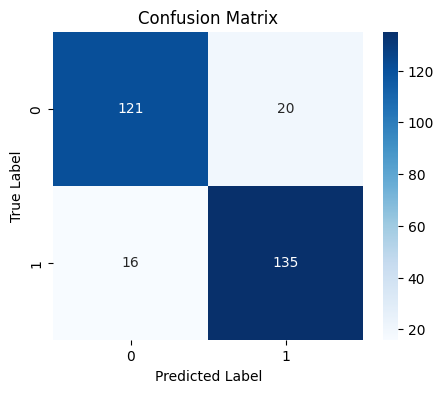

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Insight:**

- Top-left = True Negatives (correctly predicted low-price houses)

- Bottom-right = True Positives (correctly predicted high-price houses)

- Off-diagonal = Misclassifications

**2. ROC Curve & AUC**

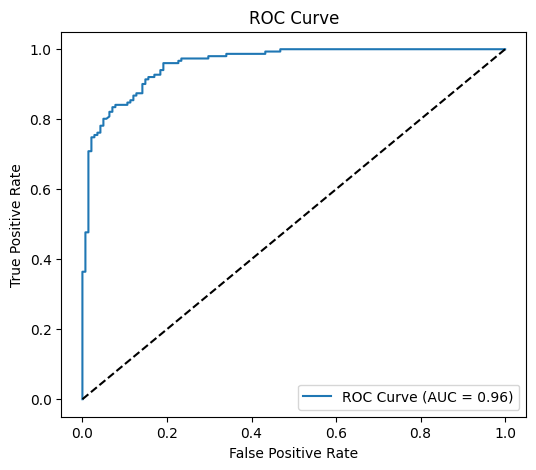

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Insight:**

- ROC curve closer to top-left corner = better performance.

- AUC near 1.0 means excellent model separation between classes.

**Assignment 7 – Evaluate with Precision, Recall, F1**

Step 1: Get Classification Report

In [13]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.883212,0.858156,0.870504,141.000000
1,0.870968,0.894040,0.882353,151.000000
accuracy,0.876712,0.876712,0.876712,0.876712
macro avg,0.877090,0.876098,0.876428,292.000000
weighted avg,0.876880,0.876712,0.876631,292.000000


Step 2: Display Results

In [14]:
print("Logistic Regression Evaluation Report")
print(classification_report(y_test, y_pred))

Logistic Regression Evaluation Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       141
           1       0.87      0.89      0.88       151

    accuracy                           0.88       292
   macro avg       0.88      0.88      0.88       292
weighted avg       0.88      0.88      0.88       292



**Reflection: Which Metric Matters Most?**

In my project, the most important metric is **Recall**, because misclassifying high-priced houses as low-priced could lead to major financial loss.
I want to **minimize false negatives**, ensuring that most expensive properties are correctly identified.
Therefore, a higher Recall for the “High Price” class is more valuable than overall Accuracy.